# ME6030 Manipuladores Robóticos

En este notebook puedes encontrar un ejemplo práctico de transformaciones.
Puede hacer otros armando sus transformadas :)

In [ ]:
%%capture
# Install necessary libraries
!pip install ipywidgets
!pip install matplotlib

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

![SCARA.png](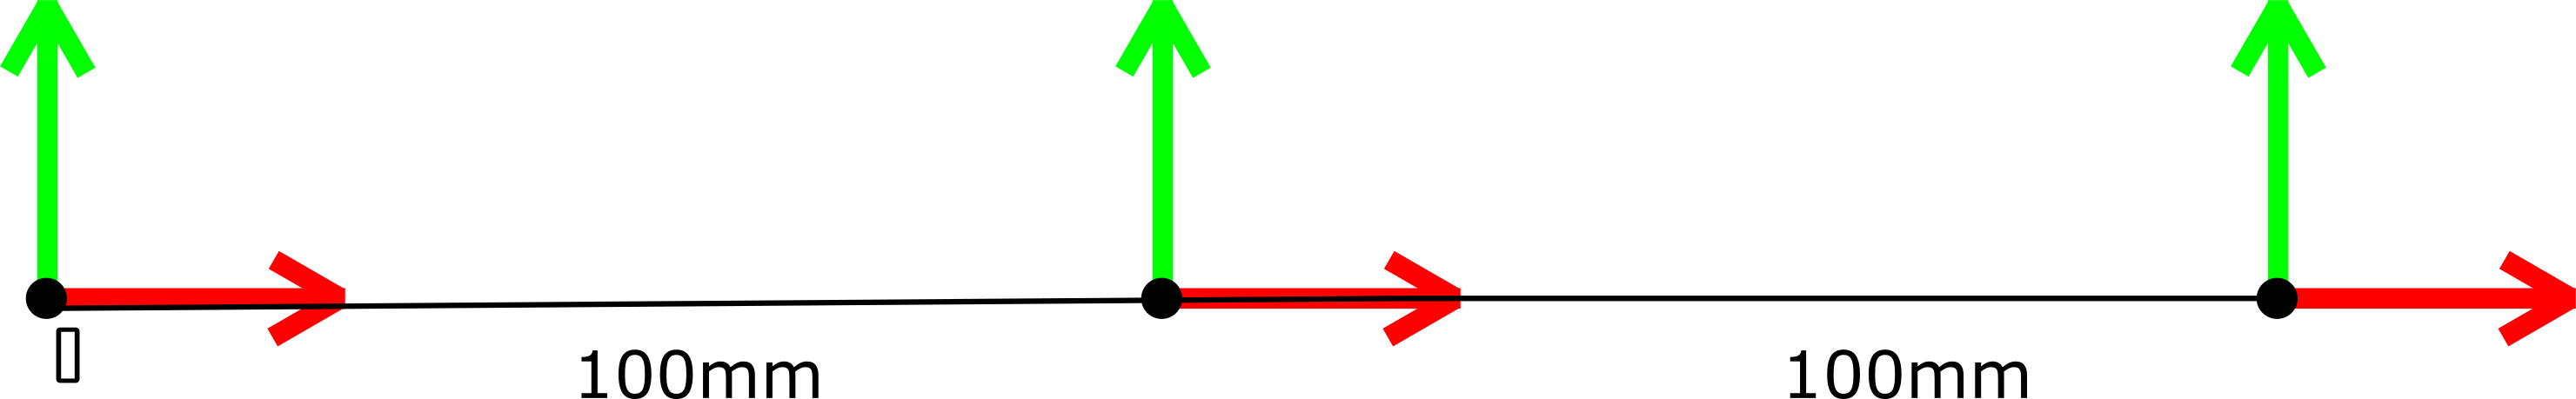![SCARA.png](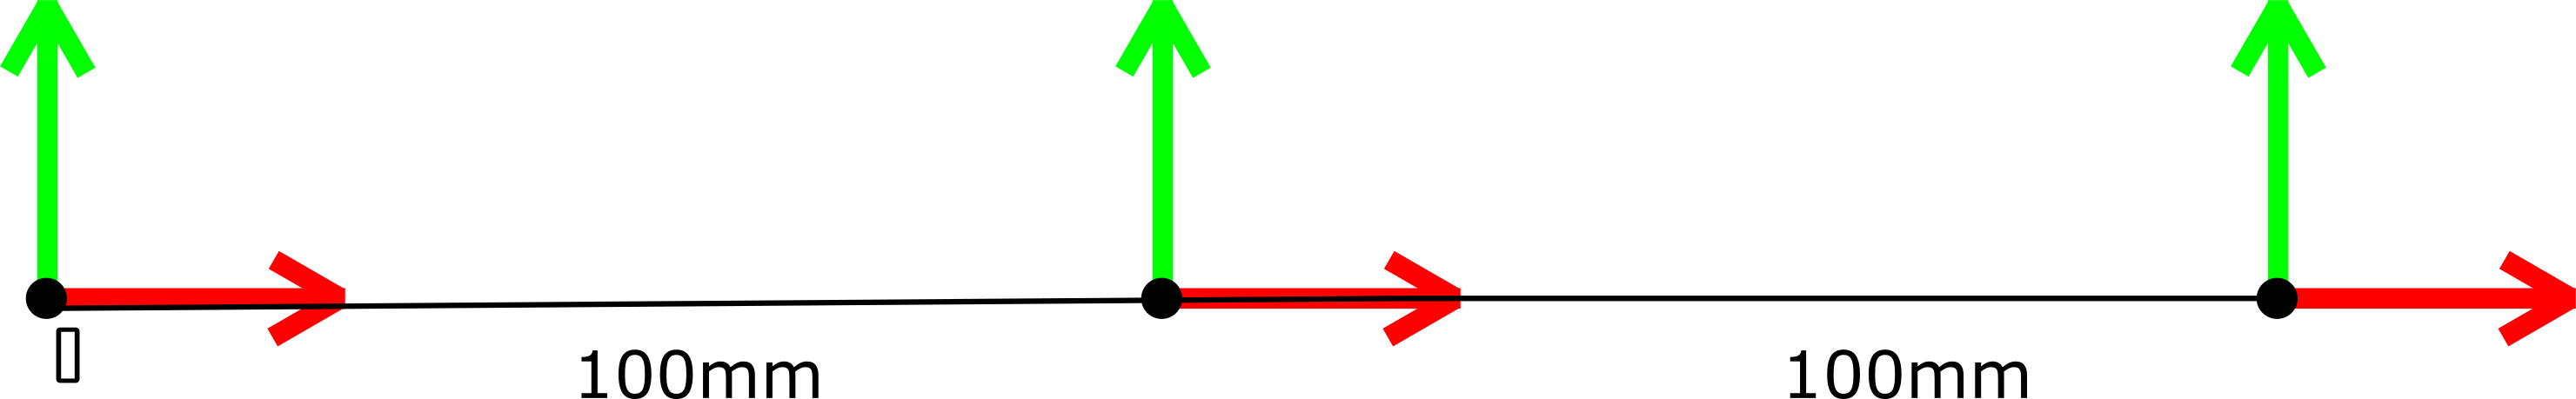![dibujo.svg](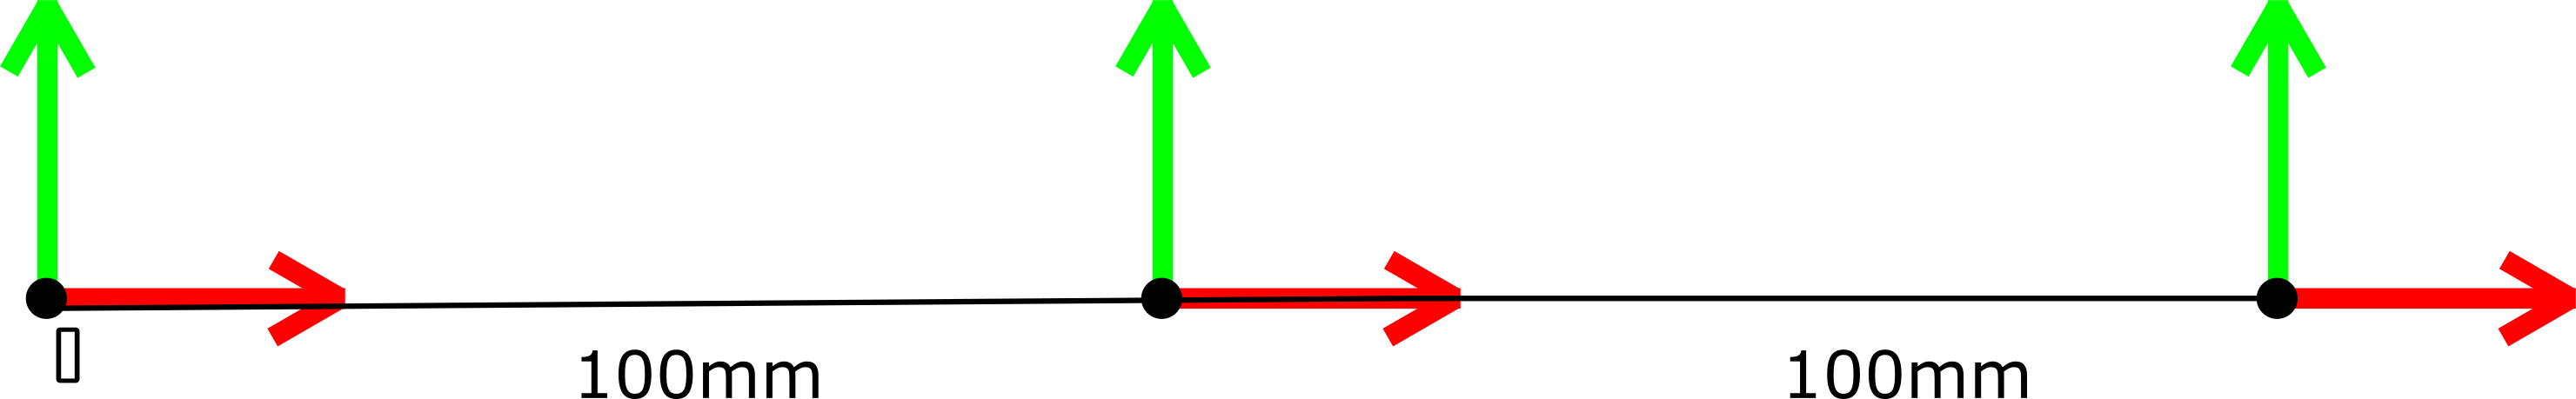)))Recordar que la matriz de poses sigue la siguiente forma:

\begin{equation*}
^AT_B=
\begin{pmatrix}
^AR_B(q_i) & ^At_B(q_i) \\
0,0,0 & 1 \\
\end{pmatrix}
\end{equation*}

Donde $^AR_b$ Es la matriz de rotacion (de un vector en B a A), y $^At_B$ es la traslacion desda A a B



Esta es la Pose final del efector. Representa un sistema de coordenadas justo donde se encuentra este efector. Con esta matriz podemos determinar la pose de un vector del sistema del efector (B) al sistema base (A), de la forma:
 $^A\tilde{p}=^AE_B \  ^B\tilde{p}$


In [ ]:
# transformaciones
import numpy as np

class Transformations:

    def translation_transform(self,x, y, z):

        return np.array([[1, 0, 0, x], [0, 1, 0, y], [0, 0, 1, z], [0, 0, 0, 1]])


    def rot_x(self, qx):

        return np.array([[1, 0, 0, 0], [0, np.cos(qx), -np.sin(qx), 0], [0, np.sin(qx), np.cos(qx), 0], [0, 0, 0, 1]])


    def rot_y(self, qy):

        return np.array([[np.cos(qy), 0, np.sin(qy), 0], [0, 1, 0, 0], [-np.sin(qy), 0, np.cos(qy), 0], [0, 0, 0, 1]])


    def rot_z(self, qz):

        return np.array([[np.cos(qz), -np.sin(qz), 0, 0], [np.sin(qz), np.cos(qz), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
import matplotlib.pyplot as plt

class PoseGenerator:
    def __init__(self):
        self.fig=None
        self.fig3D = None
        self.ax=None
        self.ax3D=None

    def create_fig3D(self):
            self.fig3D = plt.figure(figsize=(10, 6))
            self.ax3D = self.fig3D.add_subplot(111, projection='3d')
            self.ax3D.axis('equal')
            self.ax3D.set_xlim([-210,210])
            self.ax3D.set_ylim([-210,210])
            self.ax3D.set_zlim([-210,210])
            return self.ax3D, self.fig3D

    def show_fig(self):
        plt.show()

    def draw_axes_tf(self, pose, name="", color="k",marker_length=50):
                self.ax3D.set_title("SCARA")
                origin_pose = np.transpose(pose)[3, 0:3]
                x_rot = np.linalg.multi_dot([pose, [1, 0, 0, 0]])
                y_rot = np.linalg.multi_dot([pose, [0, 1, 0, 0]])
                z_rot = np.linalg.multi_dot([pose, [0, 0, 1, 0]])
                self.ax3D.quiver(origin_pose[0], origin_pose[1], origin_pose[2], x_rot[0],
                        x_rot[1], x_rot[2], length=marker_length, normalize=True, color='r')
                self.ax3D.quiver(origin_pose[0], origin_pose[1], origin_pose[2], y_rot[0],
                        y_rot[1], y_rot[2], length=marker_length, normalize=True, color='g')
                self.ax3D.quiver(origin_pose[0], origin_pose[1], origin_pose[2], z_rot[0],
                        z_rot[1], z_rot[2], length=marker_length, normalize=True, color='b')
                self.ax3D.scatter(xs=[origin_pose[0]], ys=[origin_pose[1]],zs=[origin_pose[2]], marker='o', label=name)
                self.ax3D.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

## Construcción de manipulador SCARA (2 links)
L1 = 100mm; L2 = 100mm






In [ ]:
'''#ejemplo scara
-definir Largos de cada link
-definir angulos iniciales por defecto'''
def SCARA(q1=0,q2=0):

  L1 = 100 #mm
  L2 = 100 #mm
  TF = Transformations()
  Origen = np.identity(4) #pose de origen
  #creamos las transformadas
  T_L1 = TF.translation_transform(L1,0,0)
  T_L2 = TF.translation_transform(L2,0,0)
  Rz_1 = TF.rot_z(q1)
  Rz_2 = TF.rot_z(q2)
  q1_pose = np.linalg.multi_dot([Origen,Rz_1])
  q2_pose = np.linalg.multi_dot([Origen,Rz_1,T_L1,Rz_2])

  M_o_n =  np.linalg.multi_dot([Origen,Rz_1,T_L1,Rz_2,T_L2])
  M_o_n = np.round(M_o_n,2)

  #plot de poses
  PG = PoseGenerator()
  PG.create_fig3D()
  PG.draw_axes_tf(Origen,"Pose origen")
  PG.draw_axes_tf(q1_pose,"q1 Pose")
  PG.draw_axes_tf(q2_pose,"q2 Pose")
  PG.draw_axes_tf(M_o_n,"Tip Pose")
  PG.show_fig()
  print(M_o_n)

#interact(plot_scara, theta1=(-np.pi, np.pi, 0.1), theta2=(-np.pi, np.pi, 0.1))

interact(SCARA,q1=(0, np.pi, 0.1),q2=(-np.pi/2, np.pi/2, 0.1))





interactive(children=(FloatSlider(value=0.0, description='q1', max=3.141592653589793), FloatSlider(value=0.0, …

<function __main__.SCARA(q1=0, q2=0)>

Ahora utilizando el codigo anterior modele un manipulador de los siguientes

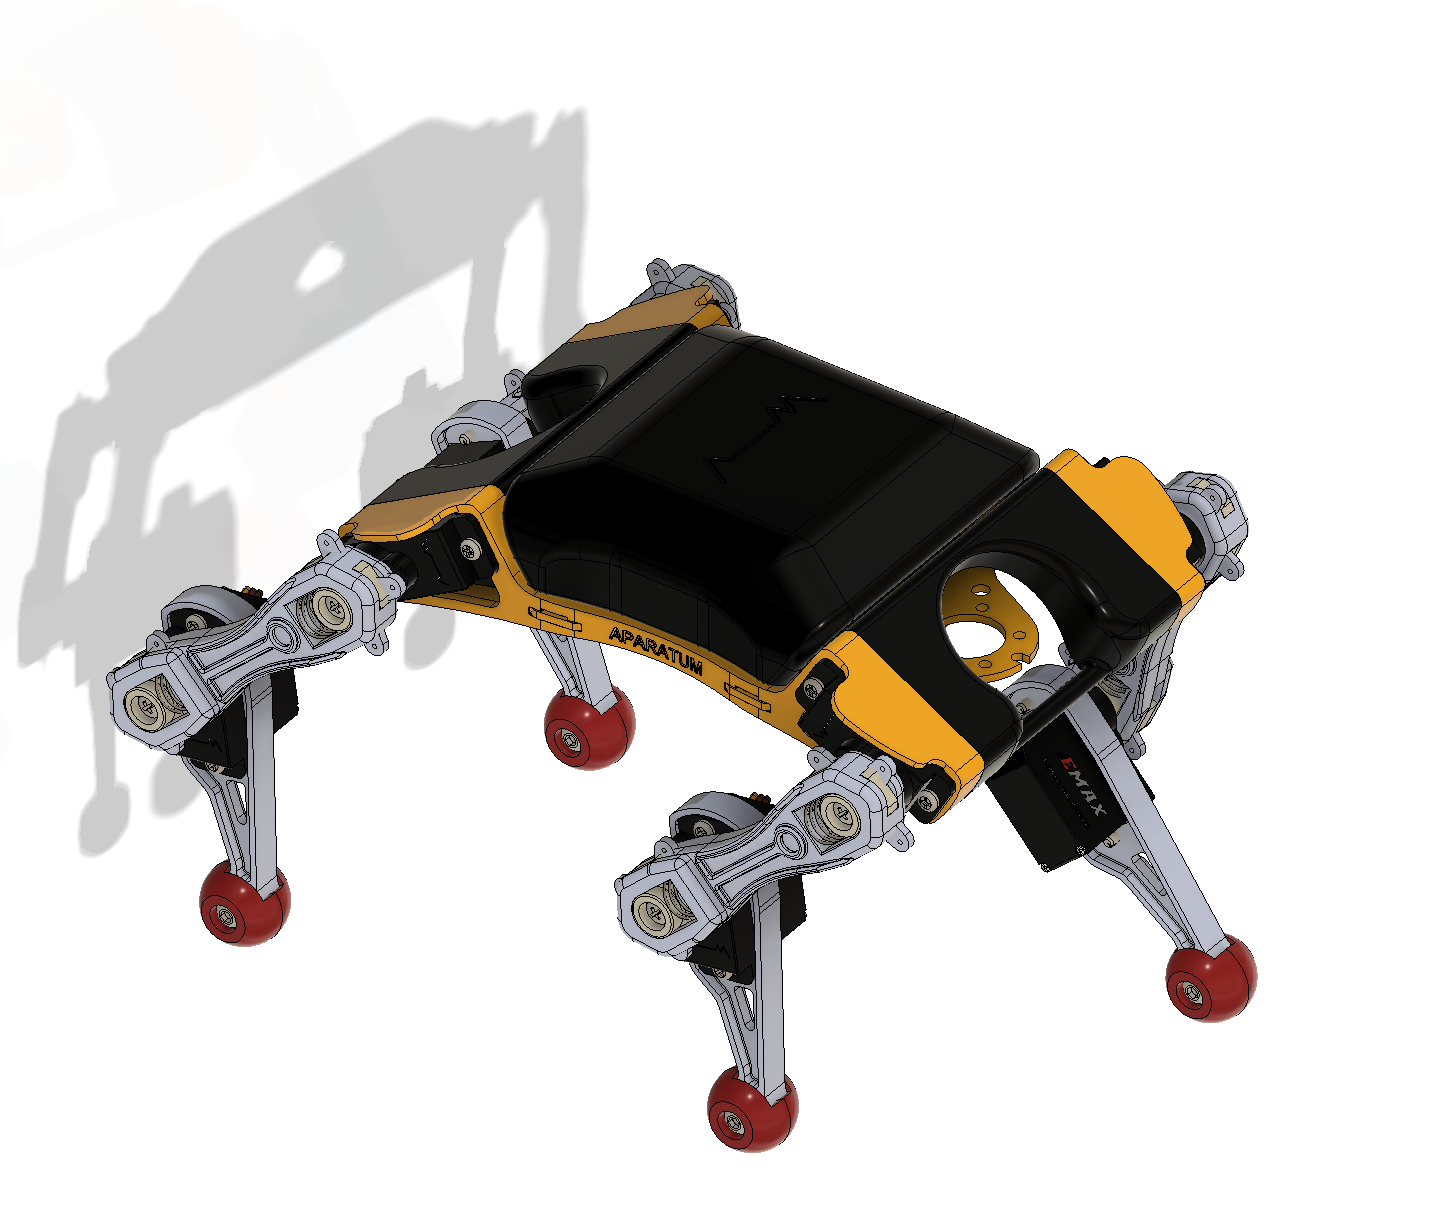

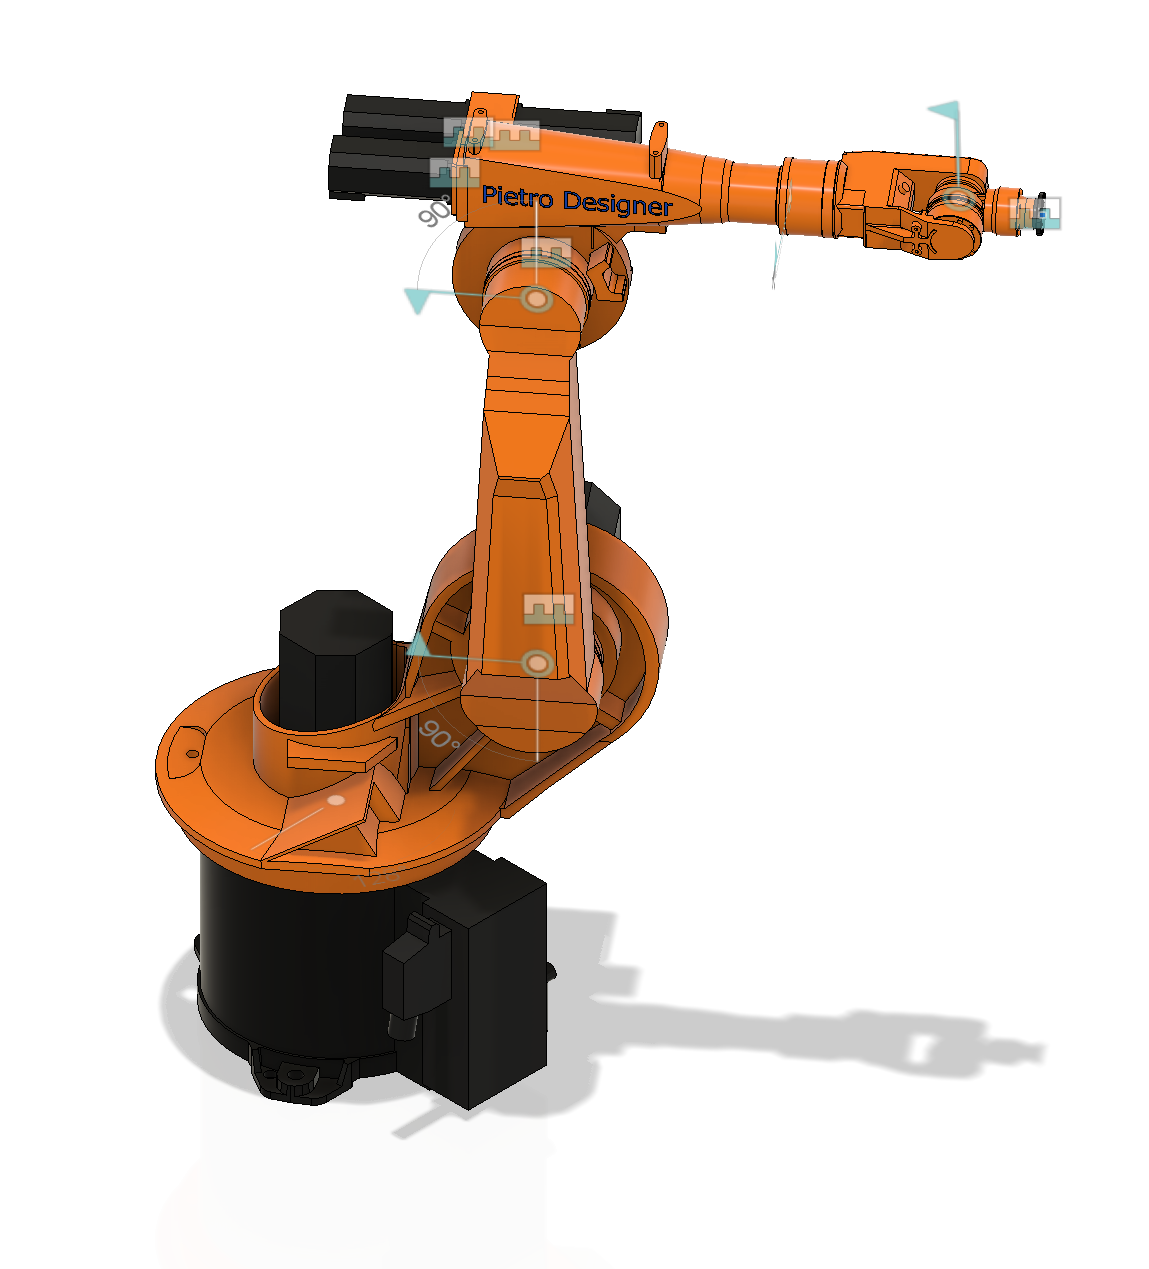

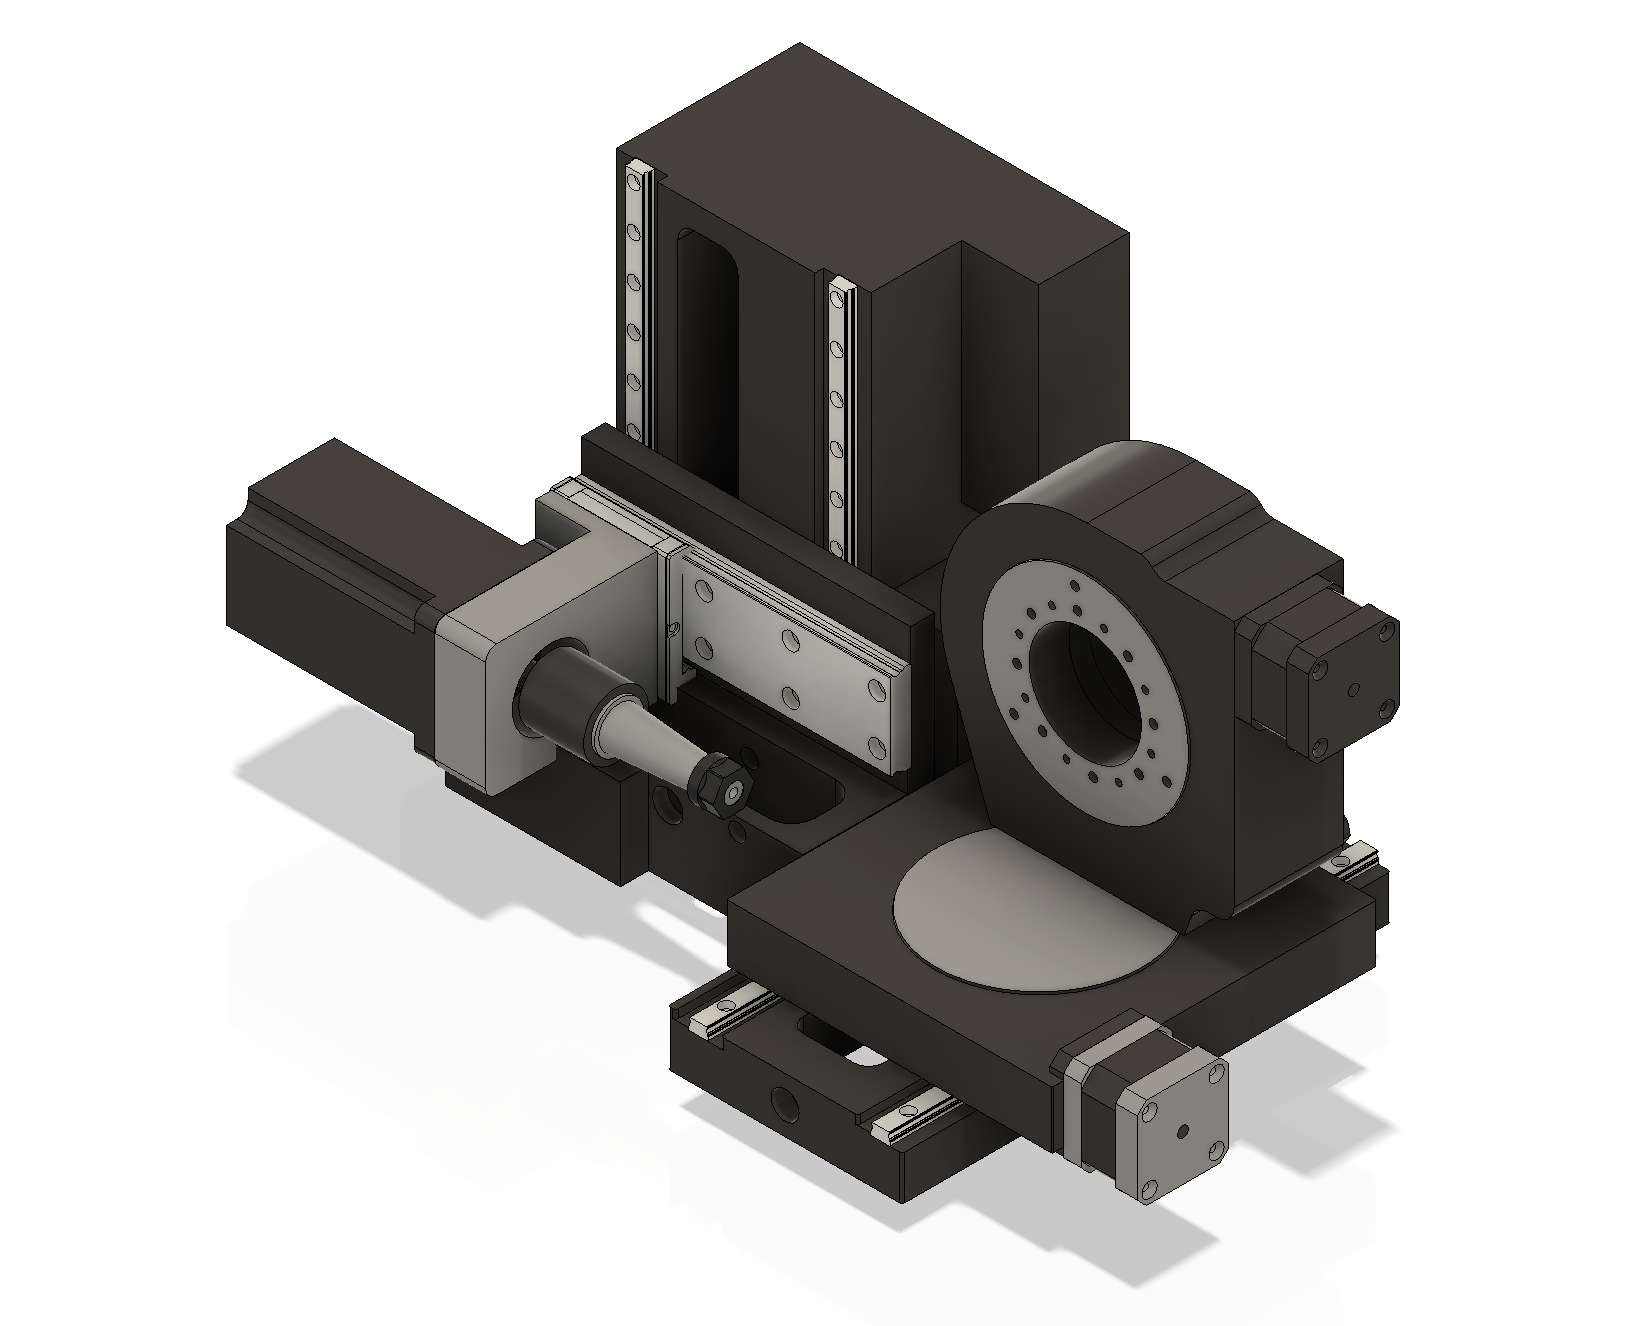

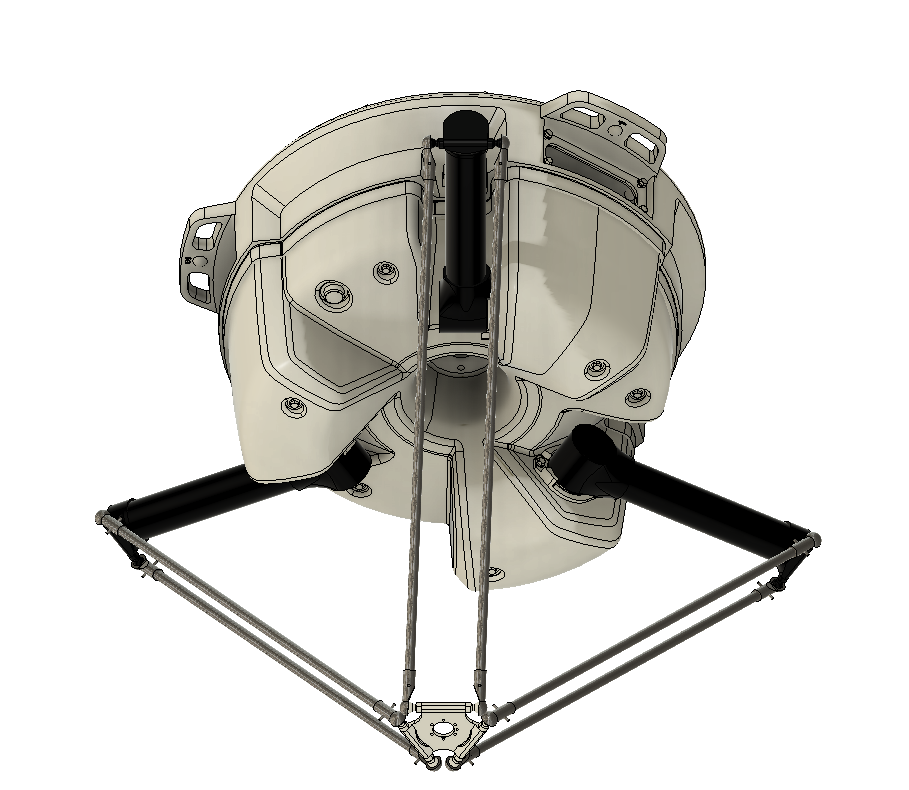

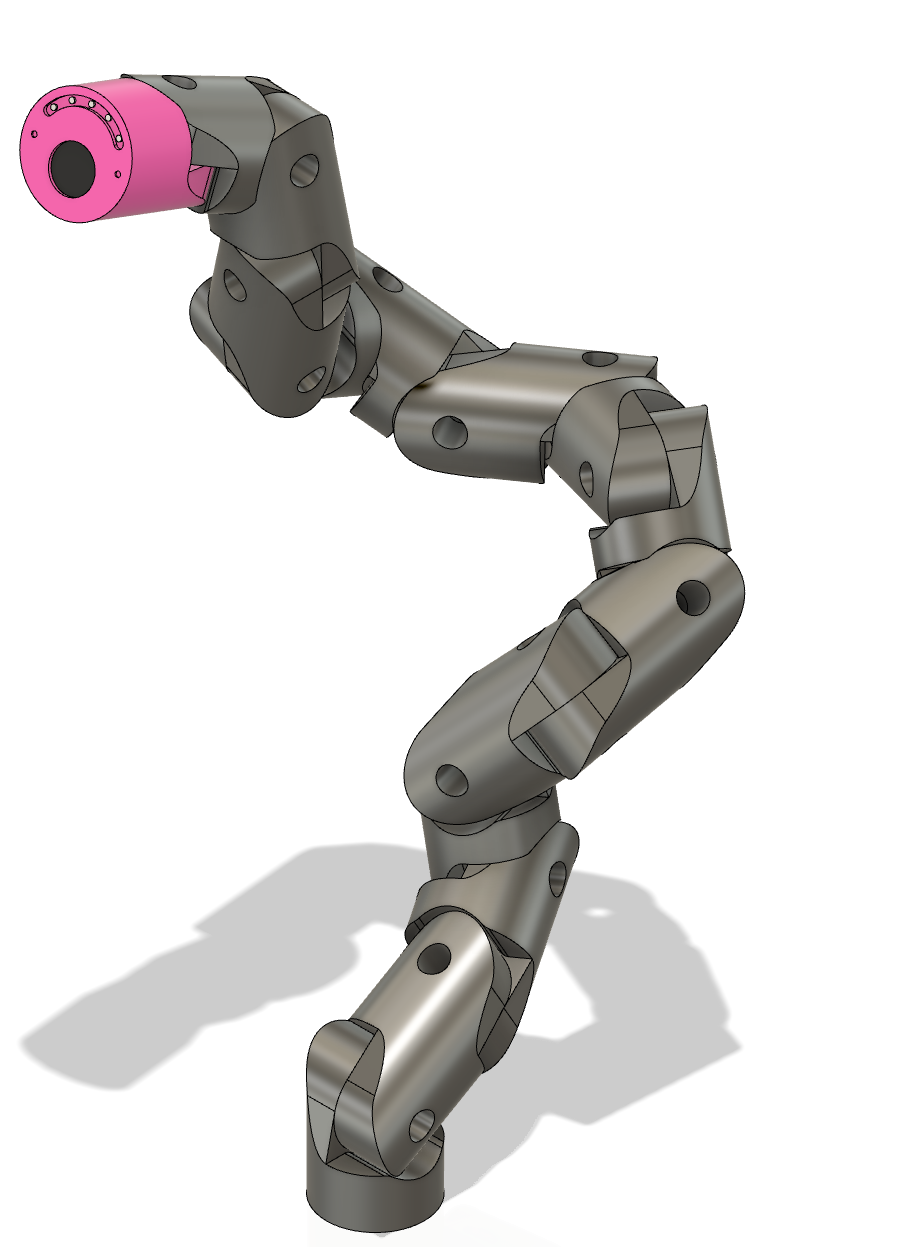